# Numerical Simulation Laboratory

# Numerical exercise 7 
I risultati di questa esercitazione sono qui riportati seguendo il procedimento della simulazione, suddivisi per le diverse fasi termodinamiche dell'Argon. In particolare ho suddivso la simulazione nelle due sezioni seguenti:

- *Lunghezza dei blocchi*, per determinare il tempo di correlazione e la dimensione adeguata dei blocchi su cui calcolare valori medi e incertezze statistiche.
- *Simulazione vera e propria*, per stimare energia, pressione e distribuzione radiale utilizzando il metodo delle medie a blocchi.

Per tutte e tre le fasi e per ogni passaggio della simulazione ho utilizzato un sistema composto da $108$ particelle.

In [2]:
import math
pi = math.pi
Kb = 1.380649 * 10**-23 #cost Boltzmann in J/K
Kb = 8.617333 * 10**-5  #cost Boltzmann in eV/K

#conversione unità ridotte in unità SI
epsilon = 120 * Kb        #unità di energia in eV
sigma = 0.34              #unità di lunghezza in nanometri
m = 6.6335209 * 10**-26   #unità di massa in Kg
T = 120                   #unità di temperatura in K
Pr = 4.2152930 * 10**7     #untà di pressioni in Pa

## Fase solida
Per il sistema nella fase solida utilizzo i seguenti valori di temperatura, densità e cut-off del potenziale riportati qui in unità ridotte di *Lennard-Jones*.
- Cut-off $r_c = 2.2$
- Densità $\rho^\star=1.1$
- Temperatura $T^\star=0.8$

### <font color=red> Lunghezza dei blocchi </font>
A partire da una configurazione equilibrata, stampo i valori istantanei di energia potenziale per particella e pressione, determinati durante una simulazione di $5 \times 10^5$ step. Sfruttando tali valori, determino la lunghezza dei blocchi calcolando l'autocorrelazione e osservando il comportamento delle incertezze statistiche al variare della lunghezza dei blocchi.

Il grafico seguente mostra l'autocorrelazione tra i valori istantanei di energia e di pressione in funzione del ritardo espresso in numero di step Montecarlo. Come si può osservare da entrambi i grafici, a distanza di qualche decina di step, i valori risultano scorrelati in quanto l'autocorrelazione tende velocemente a zero. Effettuando un fit dell'autocorrelazione con la funzione esponenziale
    $$ Ac_{[x]}(\tau) = \exp \left( -\frac{\tau}{\tau_c} \right) \,,$$
è possibile ricavare il tempo caratteristico $\tau_c$ che quantifica il numero di step necessari per avere valori tra loro scorrelati. Per le due grandezze calcolate sul sistema i valori del tempo caratteristico ottenuti dai fit sono

- Pressione $\tau_c = 8.34$
- Energia potenziale $\tau_c = 8.48$

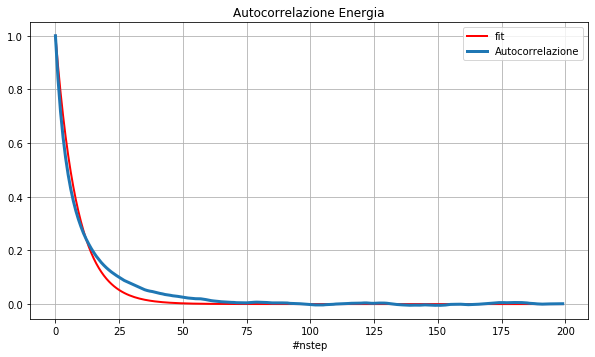

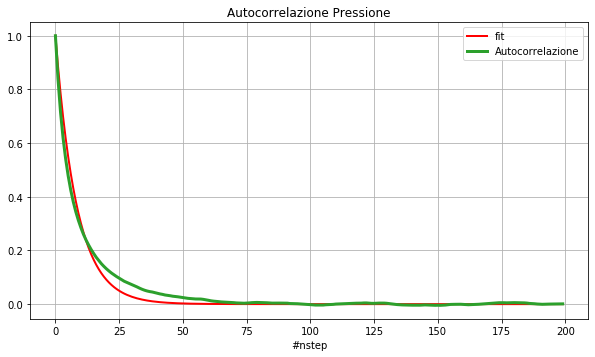

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Aene = np.loadtxt('Files/solid/Autocorr_ene.out', delimiter=' ', unpack=True) #energia
Apres = np.loadtxt('Files/solid/Autocorr_pres.out', delimiter=' ', unpack=True) #pressione
L = np.arange(200)

def f(x, tc):
    return np.exp(-x / tc)

poptE, pcovE = curve_fit(f, L, Aene) #fit autocorrelazione energia
poptP, pcovP = curve_fit(f, L, Apres) #fit autocorrelazione presssione
#print(poptE)
#print(poptP)

plt.figure(figsize=(10, 12))
plt.subplot(211)
plt.plot(L, f(L, *poptE), lw=2, color='red', label='fit') #fit
plt.plot(L, Aene, lw=3, label='Autocorrelazione', color='tab:blue') #autocorrelazione
plt.title('Autocorrelazione Energia')
plt.xlabel('#nstep')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 12))
plt.subplot(212)
plt.plot(L, f(L, *poptP), lw=2, color='red', label='fit') #fit
plt.plot(L, Apres, lw=3, label='Autocorrelazione', color='tab:green') #autocorrelazione
plt.title('Autocorrelazione Pressione')
plt.xlabel('#nstep')
plt.legend()
plt.grid(True)

plt.show()

Il grafico seguente mostra l'andamento delle incertezze statistiche stimate tramite il metodo delle medie a blocchi variando la lunghezza dei blocchi. Come è possibile osservare, per blocchi troppo corti le incertezze risultano sottostimate. Invece, oltre una determinata lunghezza, corrispondente a circa $1000$ step, le incertezze si stabilizzano e allungare i blocchi non modifica significativamente il loro valore.

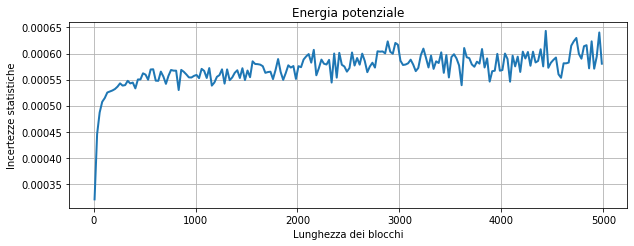

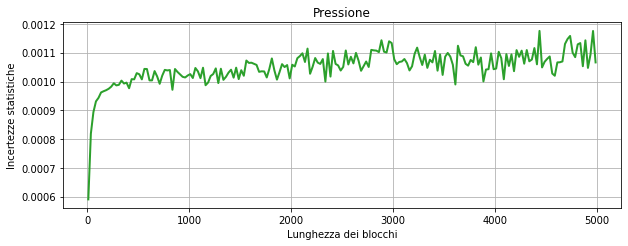

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

Le, E, errE = np.loadtxt('Files/solid/DB_ene.out', delimiter=' ', unpack=True)
Lp, P, errP = np.loadtxt('Files/solid/DB_pres.out', delimiter=' ', unpack=True)

plt.figure(figsize=(10, 7.5))
plt.subplot(211)
plt.plot(Le, errE, lw=2, label='Energia potenziale')
plt.title("Energia potenziale")
plt.xlabel('Lunghezza dei blocchi')
plt.ylabel('Incertezze statistiche')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7.5))
plt.subplot(212)
plt.plot(Lp, errP, lw=2, label='Pressione', color='tab:green')
plt.title("Pressione")
plt.xlabel('Lunghezza dei blocchi')
plt.ylabel('Incertezze statistiche')
plt.grid(True)
plt.show()

### <font color=red> Simulazione </font>
<img src="Pictures/solid.gif"  width="400" style="float:right">

Dopo aver quantificato il tempo di correlazione e la dimensione minima necessaria per non sottostimare le incertezze statistiche, posso effettuare la simulazione vera e propria per stimare i valori di energia potenziale, pressione e distribuzione radiale delle particelle del sistema utilizzando il metodo delle medie a blocchi. Effettuo la simulazione utilizzando $20$ blocchi contenenti ciascuno $1500$ step in modo da non sottostimare le incertezze statistiche. Per confronto sono mostrati anche i risultati ottenuti tramite la simulazione di <em>Dinamica Molecolare</em> sfruttando l'algoritmo di Verlet in condizioni termodinamiche analoghe. Per effettuare il confronto ho utilizzato lo <b>stesso numero di blocchi e di misure</b> in ciascun blocco: poichè la simulazione di *Dinamica Molecolare* effettua una misura ogni $10$ step, ho utilizzato $15000$ step dell'algoritmo di Verlet in ogni blocco ottenendo così $1500$ misure delle grandezze termodinamiche. In questo modo il confronto avviene su uno stesso numero di valori istantanei.

La gif qui riportata mostra le posizioni simulate delle particelle ottenute per la fase solida: si può osservare che le molecole si muovono intorno alla posizione di equilibrio reticolare mantenendo la struttura cristallina del solido.

### <font color=blue> Distribuzione radiale </font>
Determino la funzione di distribuzione radiale $g(r)$ al variare della distanza tra due particelle, sfruttando  la seguente equazione:
    $$ g(r) = \frac{1}{\rho N \Delta V} \delta \left[r-\left( r_i-r_j \right)  \right] \,,$$
dove $\Delta V$ è il volume della shell sferica infinitesimale di spessore $dr$ centrata in $r$
    $$ \Delta V = \frac{4\pi}{3}\left[\left(r+dr\right)^3-r^3  \right] \,.$$
Per effettuare il calcolo suddivido l'intervallo $[0, L/2]$ in $100$ bins di ampiezza $dr$ e per ciascuno di essi conto quante particelle si trovano ad una distanza  $r_{ij} \in [r, r+dr]$ costruendo così un istogramma il cui limite corrisponde alla funzione cercata. Al termine del procedimento normalizzo l'istogramma secondo l'equazione precedente e ottengo quindi un campionamento della funzione $g(r)$.

I grafici sottostanti mostrano i risultati così ottenuti per la funzione di distribuzione radiale utilizzando sia la simulazione di <em>Dinamica Molecolare</em> che la simulazione <em>Monte Carlo</em>. La distanza tra le particelle è espressa in unità SI. Come si può osservare i risultati coincidono in modo praticamente perfetto.

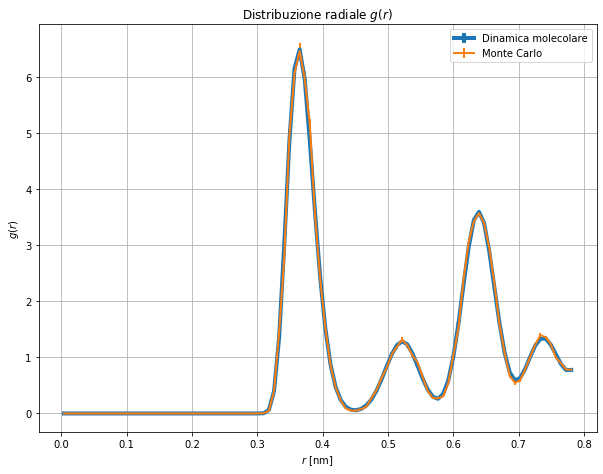

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

MD, MDg, MDgerr = np.loadtxt('Files/solid/MD_Gave.out', unpack=True) #dinamica molecolare
MC, MCg, MCgerr = np.loadtxt('Files/solid/Gave.out', unpack=True) #monte carlo
#conversione unità SI
MD *= sigma
MC *= sigma

plt.figure(figsize=(10, 7.5))
plt.errorbar(MD, MDg, yerr=MDgerr, label='Dinamica molecolare', lw=4) #dinamica molecolare
plt.errorbar(MC, MCg, yerr=MCgerr, label='Monte Carlo', lw=2) #monte carlo
plt.title('Distribuzione radiale $g(r)$')
plt.xlabel('$r$ [nm]')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.legend()
plt.show()

### <font color=blue> Energia </font>
Il grafico seguente mostra il confronto tra l'energia potenziale per particella determinata attraverso la simulazione *Monte Carlo* sfruttando l'algoritmo di Metropolis e attraverso la simulazione di *Dinamica molecolare* sfruttando l'algoritmo di Verlet: in quest'ultima simulazione, per effettuare il confronto, sono state aggiunte le **correzioni di coda** sull'energia potenziale media di ogni blocco. Per il potenziale di Lennard-Jones tali correzioni sono date dalla seguente equazione il cui risultato è espresso in unità ridotte:
    $$ \frac{\langle V_{LJ}\rangle_{tail} }{N} = \frac{8 \pi \rho}{9 r_c^9} - \frac{8 \pi \rho}{3 r_c^3} = -0.8629 \,.$$
I risultati così ottenuti sono qui riportati in unità SI in funzione del numero di misure effettuate durante le simulazioni. Come si può osservare i due procedimenti convergono a risultati qualitativamente simili ma non strettamente compatibili tra loro.

Valore finale dell'energia Monte Carlo: -0.07804 eV
Valore finale dell'energia Dinamica Molecolare: -0.07794 eV


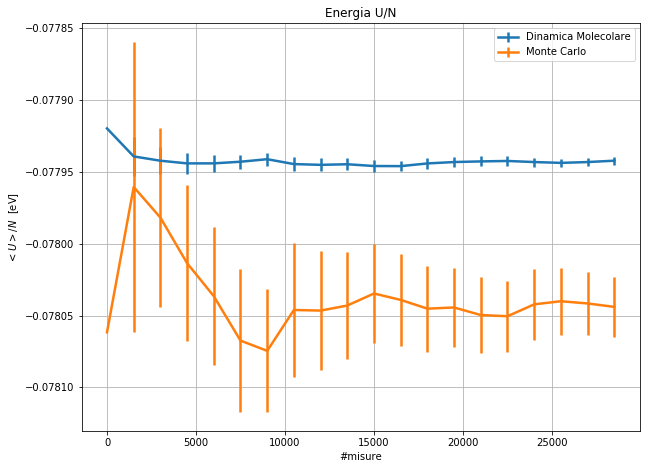

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

n, eblock, E, Eerr = np.loadtxt("Files/solid/Epot.out", unpack=True)
m, MDE, MDEerr = np.loadtxt("Files/solid/MD_Epot.out", unpack=True)
n = np.arange(3e4, step=1500)
#conversione unità SI
E *= epsilon
Eerr *= epsilon
MDE *= epsilon
MDEerr *= epsilon
print("Valore finale dell'energia Monte Carlo:", round(E[len(E)-1],5), "eV")
print("Valore finale dell'energia Dinamica Molecolare:", round(MDE[len(MDE)-1],5), "eV")

plt.figure(figsize=(10, 7.5))
plt.title('Energia U/N')
plt.xlabel('#misure')
plt.ylabel('$<U>/N$  [eV]')
plt.errorbar(n, MDE, MDEerr, label='Dinamica Molecolare', lw=2.5)
plt.errorbar(n, E, Eerr, label='Monte Carlo', lw=2.5)
plt.legend()
plt.grid(True)
plt.show()

### <font color=blue> Pressione </font>
Il grafico seguente mostra il confronto tra la pressione determinata attraverso la simulazione *Monte Carlo* sfruttando l'algoritmo di Metropolis e attraverso la simulazione di *Dinamica molecolare* sfruttando l'algoritmo di Verlet: in quest'ultima simulazione, per effettuare il confronto, sono state aggiunte le **correzioni di coda** sul viriale medio di ogni blocco, necessario per il calcolo della pressione. Per il potenziale di Lennard-Jones tali correzioni sono date dalla seguente equazione il cui risultato è espresso in unità ridotte:
    $$ \frac{\langle w_{LJ}\rangle_{tail} }{3N} = \frac{32 \pi \rho}{9 r_c^9} - \frac{16 \pi \rho}{3 r_c^3} = -1.7207 \,.$$
I risultati così ottenuti sono qui riportati in unità SI in funzione del numero di misure effettuate durante le simulazioni. Come si può osservare i due procedimenti convergono a risultati qualitativamente simili ma non compatibili tra loro.

Valore finale della pressione Monte Carlo: 319938000.0 Pa
Valore finale della pressione Dinamica Molecolare: 322115000.0 Pa


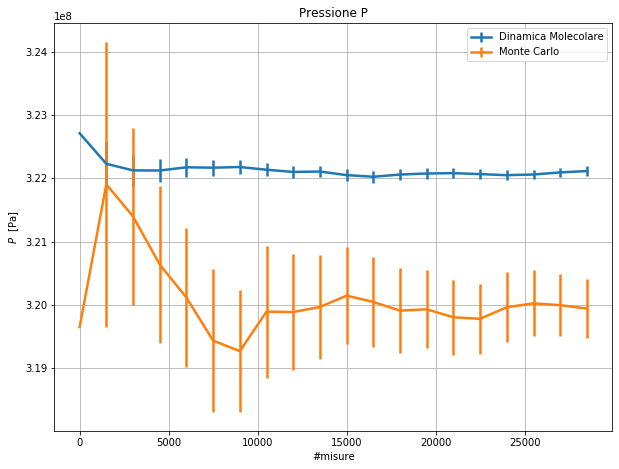

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt

m, MDP, MDPerr = np.loadtxt("Files/solid/MD_Pres.out", unpack=True)
n, pblock, P, Perr = np.loadtxt("Files/solid/Pres.out", unpack=True)
n = np.arange(3e4, step=1500)
#conversione unità SI
P *= Pr
Perr *= Pr
MDP *= Pr
MDPerr *= Pr
print("Valore finale della pressione Monte Carlo:", round(P[len(P)-1],-3), "Pa")
print("Valore finale della pressione Dinamica Molecolare:", round(MDP[len(MDP)-1],-3), "Pa")

plt.figure(figsize=(10, 7.5))
plt.title('Pressione P')
plt.xlabel('#misure')
plt.ylabel('$P$  [Pa]')
plt.errorbar(n, MDP, MDPerr, label='Dinamica Molecolare', lw=2.5)
plt.errorbar(n,P, Perr, label='Monte Carlo', lw=2.5)
plt.grid(True)
plt.legend()
plt.show()

## Fase liquida
Per il sistema nella fase solida utilizzo i seguenti valori di temperatura, densità e cut-off del potenziale riportati qui in unità ridotte di *Lennard-Jones*.
- Cut-off $r_c = 2.5$
- Densità $\rho^\star=0.8$
- Temperatura $T^\star=1.1$

### <font color=red> Lunghezza dei blocchi </font>
A partire da una configurazione equilibrata, stampo i valori istantanei di energia potenziale per particella e pressione, determinati durante una simulazione di $5 \times 10^5$ step. Sfruttando tali valori, determino la lunghezza dei blocchi calcolando l'autocorrelazione e osservando il comportamento delle incertezze statistiche al variare della lunghezza dei blocchi.

Il grafico seguente mostra l'autocorrelazione tra i valori istantanei di energia e di pressione in funzione del ritardo espresso in numero di step Montecarlo. Come si può osservare da entrambi i grafici, a distanza di qualche decina di step, i valori risultano scorrelati in quanto l'autocorrelazione tende velocemente a zero. Effettuando un fit dell'autocorrelazione con la funzione esponenziale
    $$ Ac_{[x]}(\tau) = \exp \left( -\frac{\tau}{\tau_c} \right) \,,$$
è possibile ricavare il tempo caratteristico $\tau_c$ che quantifica il numero di step necessari per avere valori tra loro scorrelati. Per le due grandezze calcolate sul sistema i valori del tempo caratteristico ottenuti dai fit sono

- Pressione $\tau_c = 8.59$
- Energia potenziale $\tau_c = 10.82$

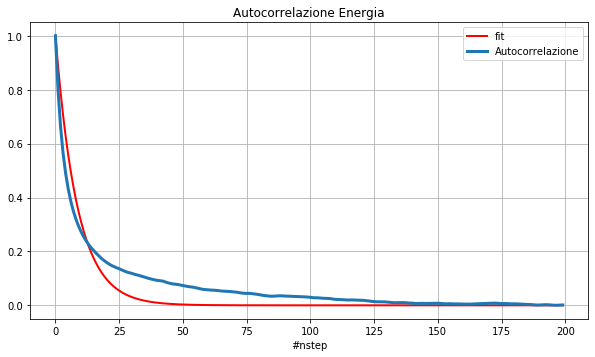

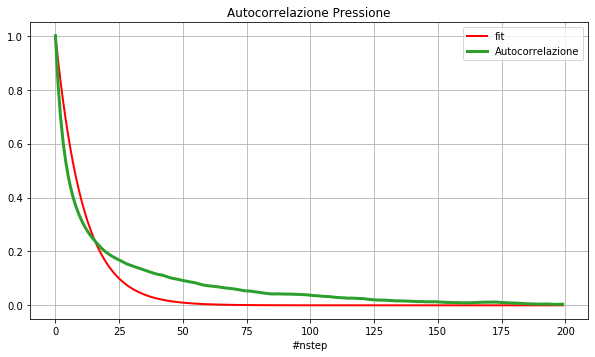

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Aene = np.loadtxt('Files/liquid/Autocorr_ene.out', delimiter=' ', unpack=True) #energia
Apres = np.loadtxt('Files/liquid/Autocorr_pres.out', delimiter=' ', unpack=True) #pressione
L = np.arange(200)

def f(x, tc):
    return np.exp(-x / tc)

poptE, pcovE = curve_fit(f, L, Aene) #fit autocorrelazione energia
poptP, pcovP = curve_fit(f, L, Apres) #fit autocorrelazione presssione
#print(poptE)
#print(poptP)

plt.figure(figsize=(10, 12))
plt.subplot(211)
plt.plot(L, f(L, *poptE), lw=2, color='red', label='fit') #fit
plt.plot(L, Aene, lw=3, label='Autocorrelazione', color='tab:blue') #autocorrelazione
plt.title('Autocorrelazione Energia')
plt.xlabel('#nstep')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 12))
plt.subplot(212)
plt.plot(L, f(L, *poptP), lw=2, color='red', label='fit') #fit
plt.plot(L, Apres, lw=3, label='Autocorrelazione', color='tab:green') #autocorrelazione
plt.title('Autocorrelazione Pressione')
plt.xlabel('#nstep')
plt.legend()
plt.grid(True)

plt.show()

Il grafico seguente mostra l'andamento delle incertezze statistiche stimate tramite il metodo delle medie a blocchi variando la lunghezza dei blocchi. Come è possibile osservare, per blocchi troppo corti le incertezze risultano sottostimate; invece, oltre una determinata lunghezza, corrispondente a circa $1000$ step, le incertezze si stabilizzano e allungare i blocchi non modifica significativamente il loro valore.

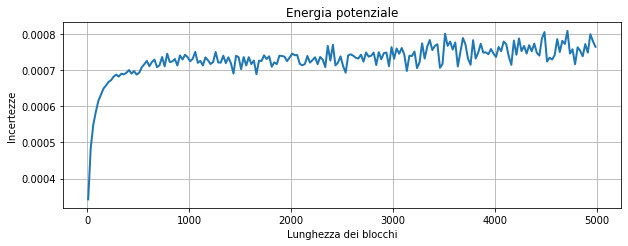

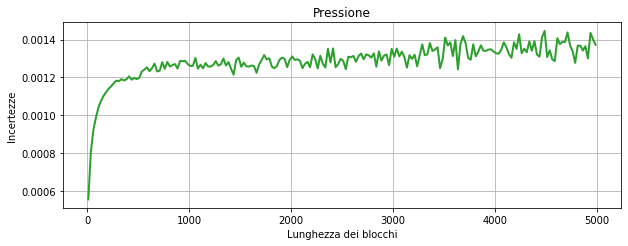

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt

Le, E, errE = np.loadtxt('Files/liquid/DB_ene.out', delimiter=' ', unpack=True)
Lp, P, errP = np.loadtxt('Files/liquid/DB_pres.out', delimiter=' ', unpack=True)

plt.figure(figsize=(10, 7.5))
plt.subplot(211)
plt.plot(Le, errE, lw=2, label='Energia potenziale')
plt.title("Energia potenziale")
plt.xlabel('Lunghezza dei blocchi')
plt.ylabel('Incertezze')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7.5))
plt.subplot(212)
plt.plot(Lp, errP, lw=2, label='Pressione', color='tab:green')
plt.title("Pressione")
plt.xlabel('Lunghezza dei blocchi')
plt.ylabel('Incertezze')
plt.grid(True)
plt.show()

### <font color=red> Simulazione </font>
<img src="Pictures/liquid.gif"  width="400" style="float:right">

Dopo aver quantificato il tempo di correlazione e la dimensione minima necessaria per non sottostimare le incertezze statistiche, posso effettuare la simulazione vera e propria per stimare i valori di energia potenziale, pressione e distribuzione radiale delle particelle del sistema utilizzando il metodo delle medie a blocchi. Effettuo la simulazione utilizzando $100$ blocchi contenenti ciascuno $1000$ step in modo da non sottostimare le incertezze statistiche. Per confronto sono mostrati anche i risultati ottenuti tramite la simulazione di <em>Dinamica Molecolare</em> sfruttando l'algoritmo di Verlet in condizioni termodinamiche analoghe. Per effettuare il confronto ho utilizzato lo <b>stesso numero di blocchi e di misure</b> in ciascun blocco: poichè la simulazione di *Dinamica Molecolare* effettua una misura ogni $10$ step, ho utilizzato $15000$ step dell'algoritmo di Verlet in ogni blocco ottenendo così $1500$ misure delle grandezze termodinamiche. In questo modo il confronto avviene su uno stesso numero di valori istantanei.

La gif qui riportata mostra le posizioni simulate delle particelle ottenute per la fase liquida: si può osservare il moto caotico ma fortemente legato che caratterizza la fase liquida del sistema.

### <font color=blue> Distribuzione radiale </font>
Come nel caso precedente determino la funzione di distribuzione radiale utilizzando sia la simulazione di <em>Dinamica Molecolare</em> che la simulazione <em>Monte Carlo</em>,  suddividendo l'intervallo $[0, L/2]$ in $100$ sottointervalli per costruire l'istogramma corrispondente a $g(r)$.

I grafici sottostanti mostrano i risultati ottenuti per la funzione $g(r)$ utilizzando sia la simulazione di <em>Dinamica Molecolare</em> che la simulazione <em>Monte Carlo</em>. La distanza tra le particelle è espressa in unità SI. Come si può osservare i risultati delle due simulazioni presentano un ottimo accordo.

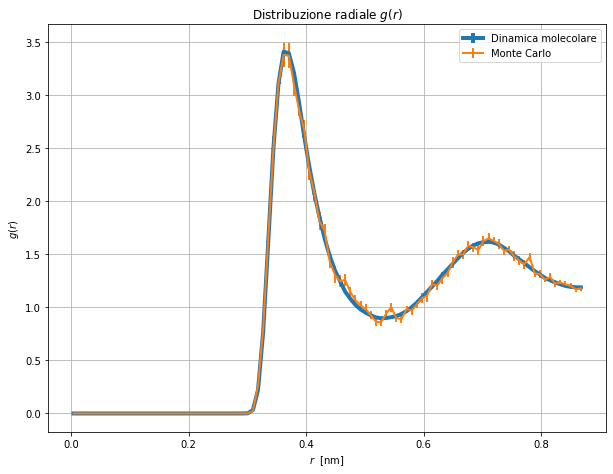

In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt

MD, MDg, MDgerr = np.loadtxt('Files/liquid/MD_Gave.out', unpack=True) #dinamica molecolare
MC, MCg, MCgerr = np.loadtxt('Files/liquid/Gave.out', unpack=True) #monte carlo
#conversione unità SI
MD *= sigma
MC *= sigma

plt.figure(figsize=(10, 7.5))
plt.errorbar(MD, MDg, yerr=MDgerr, label='Dinamica molecolare', lw=4) #dinamica molecolare
plt.errorbar(MC, MCg, yerr=MCgerr, label='Monte Carlo', lw=2) #monte carlo
plt.title('Distribuzione radiale $g(r)$')
plt.xlabel('$r$  [nm]')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.legend()
plt.show()

### <font color=blue> Energia </font>
Il grafico seguente mostra il confronto tra l'energia potenziale per particella determinata attraverso la simulazione *Monte Carlo* sfruttando l'algoritmo di Metropolis e attraverso la simulazione di *Dinamica molecolare* sfruttando l'algoritmo di Verlet: in quest'ultima simulazione, per effettuare il confronto, sono state aggiunte le **correzioni di coda** sull'energia potenziale media di ogni blocco. Per il potenziale di Lennard-Jones tali correzioni sono date dalla seguente equazione il cui risultato è espresso in unità ridotte:
    $$ \frac{\langle V_{LJ}\rangle_{tail} }{N} = \frac{8 \pi \rho}{9 r_c^9} - \frac{8 \pi \rho}{3 r_c^3} = -0.4283 \,.$$
I risultati così ottenuti sono qui riportati in unità SI in funzione del numero di misure effettuate durante le simulazioni. Come si può osservare i due procedimenti convergono a risultati qualitativamente simili e compatibili tra loro.

Valore finale dell'energia Monte Carlo: -0.05644 eV
Valore finale dell'energia Dinamica Molecolare: -0.0564 eV


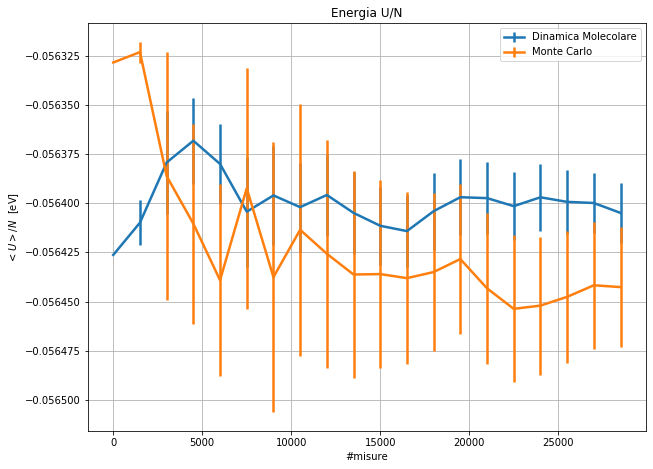

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt

m, MDE, MDEerr = np.loadtxt("Files/liquid/MD_Epot.out", unpack=True)
n, eblock, E, Eerr = np.loadtxt("Files/liquid/Epot.out", unpack=True)
n = np.arange(3e4, step=1500)
#conversione unità SI
E *= epsilon
Eerr *= epsilon
MDE *= epsilon
MDEerr *= epsilon
print("Valore finale dell'energia Monte Carlo:", round(E[len(E)-1],5), "eV")
print("Valore finale dell'energia Dinamica Molecolare:", round(MDE[len(MDE)-1],5), "eV")

plt.figure(figsize=(10, 7.5))
plt.title('Energia U/N')
plt.xlabel('#misure')
plt.ylabel('$<U>/N$  [eV]')
plt.errorbar(n, MDE, MDEerr, label='Dinamica Molecolare', lw=2.5)
plt.errorbar(n, E, Eerr, label='Monte Carlo', lw=2.5)
plt.legend()
plt.grid(True)
plt.show()

### <font color=blue> Pressione </font>
Il grafico seguente mostra il confronto tra la pressione determinata attraverso la simulazione *Monte Carlo* sfruttando l'algoritmo di Metropolis e attraverso la simulazione di *Dinamica molecolare* sfruttando l'algoritmo di Verlet. Per effettuare tale confronto, in quest'ultima simulazione, sono state aggiunte le **correzioni di coda** sul viriale medio di ogni blocco, necessario per il calcolo della pressione. Per il potenziale di Lennard-Jones tali correzioni sono date dalla seguente equazione il cui risultato è espresso in unità ridotte:
    $$ \frac{\langle w_{LJ}\rangle_{tail} }{3N} = \frac{32 \pi \rho}{9 r_c^9} - \frac{16 \pi \rho}{3 r_c^3} = -0.8555 \,.$$
I risultati così ottenuti sono qui riportati in unità SI in funzione del numero di misure effettuate durante le simulazioni. Come si può osservare i due procedimenti convergono a risultati qualitativamente simili e compatibili tra loro.

Valore finale della pressione Monte Carlo: 60245000.0 Pa
Valore finale della pressione Dinamica Molecolare: 61059000.0 Pa


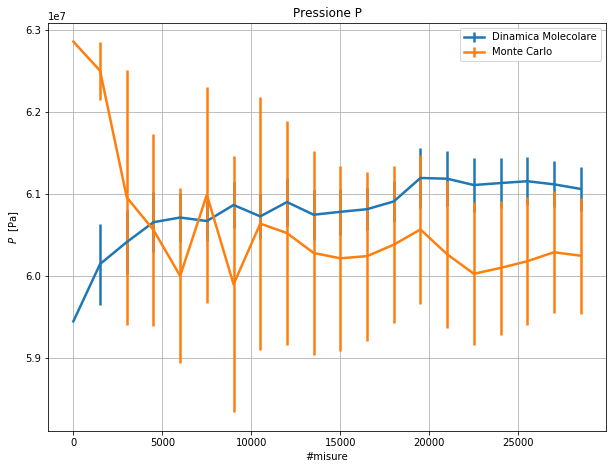

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt

m, MDP, MDPerr = np.loadtxt("Files/liquid/MD_Pres.out", unpack=True)
n, pblock, P, Perr = np.loadtxt("Files/liquid/Pres.out", unpack=True)
n = np.arange(3e4, step=1500)
#conversione unità SI
P *= Pr
Perr *= Pr
MDP *= Pr
MDPerr *= Pr
print("Valore finale della pressione Monte Carlo:", round(P[len(P)-1],-3), "Pa")
print("Valore finale della pressione Dinamica Molecolare:", round(MDP[len(MDP)-1],-3), "Pa")

plt.figure(figsize=(10, 7.5))
plt.title('Pressione P')
plt.xlabel('#misure')
plt.ylabel('$P$  [Pa]')
plt.errorbar(n, MDP, MDPerr, label='Dinamica Molecolare', lw=2.5)
plt.errorbar(n,P, Perr, label='Monte Carlo', lw=2.5)
plt.grid(True)
plt.legend()
plt.show()

## Fase gassosa
Per il sistema nella fase solida utilizzo i seguenti valori di temperatura, densità e cut-off del potenziale riportati qui in unità ridotte di *Lennard-Jones*.
- Cut-off $r_c = 5.0$
- Densità $\rho^\star=0.05$
- Temperatura $T^\star=1.2$

### <font color=red> Lunghezza dei blocchi </font>
A partire da una configurazione equilibrata, stampo i valori istantanei di energia potenziale per particella e pressione, determinati durante una simulazione di $5 \times 10^5$ step. Sfruttando tali valori, determino la lunghezza dei blocchi calcolando l'autocorrelazione e osservando il comportamento delle incertezze statistiche al variare della lunghezza dei blocchi.

Il grafico seguente mostra l'autocorrelazione tra i valori istantanei di energia e di pressione in funzione del ritardo espresso in numero di step Montecarlo. Come si può osservare da entrambi i grafici, a distanza di qualche decina di step, i valori risultano scorrelati in quanto l'autocorrelazione tende velocemente a zero. Effettuando un fit dell'autocorrelazione con la funzione esponenziale
    $$ Ac_{[x]}(\tau) = \exp \left( -\frac{\tau}{\tau_c} \right) \,,$$
è possibile ricavare il tempo caratteristico $\tau_c$ che quantifica il numero di step necessari per avere valori tra loro scorrelati. Per le due grandezze calcolate sul sistema i valori del tempo caratteristico ottenuti dai fit sono sensibilmente inferiori rispetto alle due fasi precedenti:

- Pressione $\tau_c = 2.36$
- Energia potenziale $\tau_c = 0.87 $

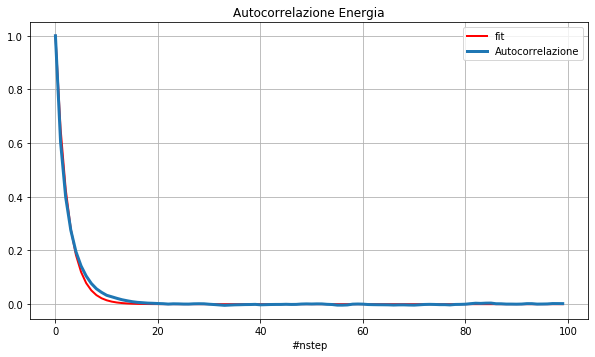

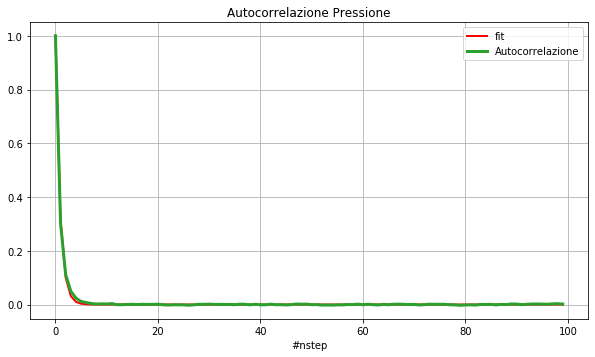

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Aene = np.loadtxt('Files/gas/Autocorr_ene.out', delimiter=' ', unpack=True) #energia
Apres = np.loadtxt('Files/gas/Autocorr_pres.out', delimiter=' ', unpack=True) #pressione
L = np.arange(100)

def f(x, tc):
    return np.exp(-x / tc)

poptE, pcovE = curve_fit(f, L, Aene) #fit autocorrelazione energia
poptP, pcovP = curve_fit(f, L, Apres) #fit autocorrelazione presssione
#print(poptE)
#print(poptP)

plt.figure(figsize=(10, 12))
plt.subplot(211)
plt.plot(L, f(L, *poptE), lw=2, color='red', label='fit') #fit
plt.plot(L, Aene, lw=3, label='Autocorrelazione', color='tab:blue') #autocorrelazione
plt.title('Autocorrelazione Energia')
plt.xlabel('#nstep')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 12))
plt.subplot(212)
plt.plot(L, f(L, *poptP), lw=2, color='red', label='fit') #fit
plt.plot(L, Apres, lw=3, label='Autocorrelazione', color='tab:green') #autocorrelazione
plt.title('Autocorrelazione Pressione')
plt.xlabel('#nstep')
plt.legend()
plt.grid(True)

plt.show()

Il grafico seguente mostra l'andamento delle incertezze statistiche stimate tramite il metodo delle medie a blocchi variando la lunghezza dei blocchi. Come è possibile osservare le incertezze della fase gassosa presentano un comportamento meno regolare rispetto alle situazioni precedenti e anche a dimensioni di $5000$ step per blocco non si osserva una stabilizzazione delgli errori statistici.

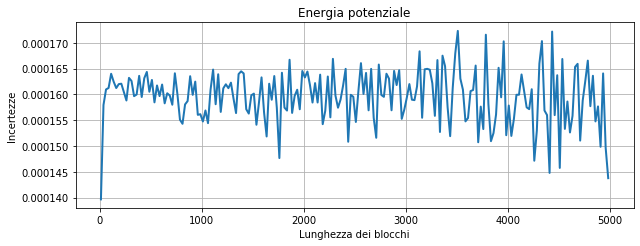

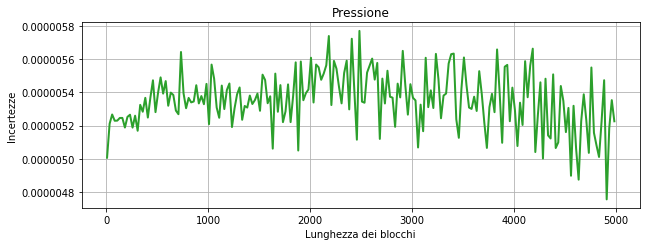

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt

Le, E, errE = np.loadtxt('Files/gas/DB_ene.out', delimiter=' ', unpack=True)
Lp, P, errP = np.loadtxt('Files/gas/DB_pres.out', delimiter=' ', unpack=True)

plt.figure(figsize=(10, 7.5))
plt.subplot(211)
plt.plot(Le, errE, lw=2, label='Energia potenziale')
plt.title("Energia potenziale")
plt.xlabel('Lunghezza dei blocchi')
plt.ylabel('Incertezze')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7.5))
plt.subplot(212)
plt.plot(Lp, errP, lw=2, label='Pressione', color='tab:green')
plt.title("Pressione")
plt.xlabel('Lunghezza dei blocchi')
plt.ylabel('Incertezze')
plt.grid(True)
plt.show()

### <font color=red> Simulazione </font>
<img src="Pictures/gas.gif"  width="400" style="float:right">

Dopo aver quantificato il tempo di correlazione e la dimensione minima necessaria per non sottostimare le incertezze statistiche, posso effettuare la simulazione vera e propria per stimare i valori di energia potenziale, pressione e distribuzione radiale delle particelle del sistema utilizzando il metodo delle medie a blocchi. Effettuo la simulazione utilizzando $100$ blocchi contenenti ciascuno $1000$ step in modo da non sottostimare le incertezze statistiche.Per confronto sono mostrati anche i risultati ottenuti tramite la simulazione di <em>Dinamica Molecolare</em> sfruttando l'algoritmo di Verlet in condizioni termodinamiche analoghe. Per effettuare il confronto ho utilizzato lo <b>stesso numero di blocchi e di misure</b> in ciascun blocco: poichè la simulazione di *Dinamica Molecolare* effettua una misura ogni $10$ step, ho utilizzato $15000$ step dell'algoritmo di Verlet in ogni blocco ottenendo così $1500$ misure delle grandezze termodinamiche. In questo modo il confronto avviene su uno stesso numero di valori istantanei.

La gif qui riportata mostra le posizioni simulate delle particelle ottenute per la fase gassosa: si può osservare il moto caotico e poco legato che caratterizza la fase gassosa del sistema. A differenza dei casi precedenti è evidente una significativa diminuzione di densità.

### <font color=blue> Distribuzione radiale </font>

Come nel caso precedente determino la funzione di distribuzione radiale utilizzando sia la simulazione di <em>Dinamica Molecolare</em> che la simulazione <em>Monte Carlo</em>,  suddividendo l'intervallo $[0, L/2]$ in $100$ sottointervalli per costruire l'istogramma corrispondente a $g(r)$.

I grafici sottostanti mostrano i risultati ottenuti per la funzione $g(r)$ utilizzando sia la simulazione di <em>Dinamica Molecolare</em> che la simulazione <em>Monte Carlo</em>. La distanza tra le particelle è espressa in unità SI. Come si può osservare i risultati sono estremamente simili.

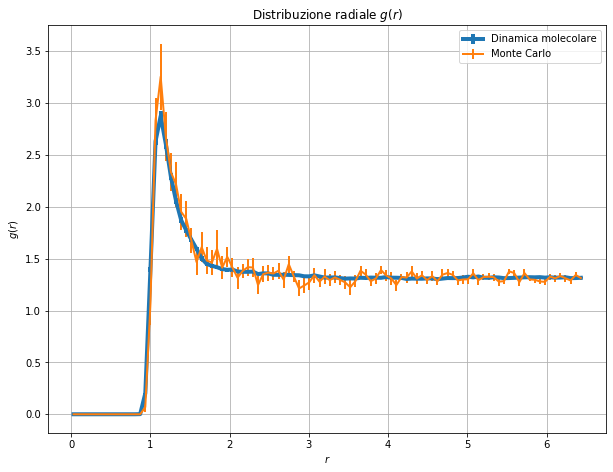

In [67]:
import math
import numpy as np
import matplotlib.pyplot as plt

MD, MDg, MDgerr = np.loadtxt('Files/gas/MD_Gave.out', unpack=True) #dinamica molecolare
MC, MCg, MCgerr = np.loadtxt('Files/gas/Gave.out', unpack=True) #monte carlo

plt.figure(figsize=(10, 7.5))
plt.errorbar(MD, MDg, yerr=MDgerr, label='Dinamica molecolare', lw=4) #dinamica molecolare
plt.errorbar(MC, MCg, yerr=MCgerr, label='Monte Carlo', lw=2) #monte carlo
plt.title('Distribuzione radiale $g(r)$')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.legend()
plt.show()

### <font color=blue> Energia </font>
Il grafico seguente mostra il confronto tra l'energia potenziale per particella determinata attraverso la simulazione *Monte Carlo* sfruttando l'algoritmo di Metropolis e attraverso la simulazione di *Dinamica molecolare* sfruttando l'algoritmo di Verlet: in quest'ultima simulazione, per effettuare il confronto, sono state aggiunte le **correzioni di coda** sull'energia potenziale media di ogni blocco. Per il potenziale di Lennard-Jones tali correzioni sono date dalla seguente equazione il cui risultato è espresso in unità ridotte:
    $$ \frac{\langle V_{LJ}\rangle_{tail} }{N} = \frac{8 \pi \rho}{9 r_c^9} - \frac{8 \pi \rho}{3 r_c^3} = -0.0034 \,.$$
I risultati così ottenuti sono qui riportati in unità SI in funzione del numero di misure effettuate durante le simulazioni. Come si può osservare i due procedimenti convergono a risultati qualitativamente simili e non compatibili tra loro.

Valore finale dell'energia Monte Carlo: -0.00428 eV
Valore finale dell'energia Dinamica Molecolare: -0.00414 eV


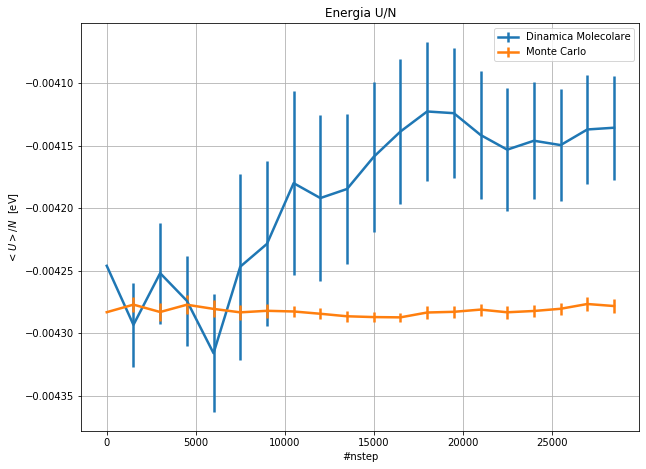

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

m, MDE, MDEerr = np.loadtxt("Files/gas/MD_Epot.out", unpack=True)
n, eblock, E, Eerr = np.loadtxt("Files/gas/Epot.out", unpack=True)
n = np.arange(3e4, step=1500)
#conversione unità SI
E *= epsilon
Eerr *= epsilon
MDE *= epsilon
MDEerr *= epsilon
print("Valore finale dell'energia Monte Carlo:", round(E[len(E)-1],5), "eV")
print("Valore finale dell'energia Dinamica Molecolare:", round(MDE[len(MDE)-1],5), "eV")

plt.figure(figsize=(10, 7.5))
plt.title('Energia U/N')
plt.xlabel('#nstep')
plt.ylabel('$<U>/N$  [eV]')
plt.errorbar(n, MDE, MDEerr, label='Dinamica Molecolare', lw=2.5)
plt.errorbar(n, E, Eerr, label='Monte Carlo', lw=2.5)
plt.legend()
plt.grid(True)
plt.show()

### <font color=blue> Pressione </font>
Il grafico seguente mostra il confronto tra la pressione determinata attraverso la simulazione *Monte Carlo* sfruttando l'algoritmo di Metropolis e attraverso la simulazione di *Dinamica molecolare* sfruttando l'algoritmo di Verlet: in quest'ultima simulazione, per effettuare il confronto,  sono state aggiunte le **correzioni di coda** sul viriale medio di ogni blocco, necessario per il calcolo della pressione. Per il potenziale di Lennard-Jones tali correzioni sono date dalla seguente equazione il cui risultato è espresso in unità ridotte:
    $$ \frac{\langle w_{LJ}\rangle_{tail} }{3N} = \frac{32 \pi \rho}{9 r_c^9} - \frac{16 \pi \rho}{3 r_c^3} = -0.0067 \,.$$
I risultati così ottenuti sono qui riportati in unità SI in funzione del numero di misure effettuate durante le simulazioni. Come si può osservare i due procedimenti convergono a risultati qualitativamente simili ma non compatibili tra loro.

Valore finale della pressione Monte Carlo: 2068000.0 Pa
Valore finale della pressione Dinamica Molecolare: 2086000.0 Pa


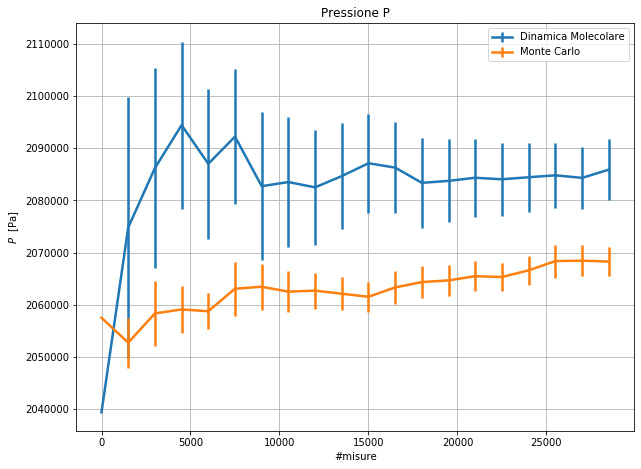

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt

m, MDP, MDPerr = np.loadtxt("Files/gas/MD_Pres.out", unpack=True)
n, pblock, P, Perr = np.loadtxt("Files/gas/Pres.out", unpack=True)
n = np.arange(3e4, step=1500)
#conversione unità SI
P *= Pr
Perr *= Pr
MDP *= Pr
MDPerr *= Pr
print("Valore finale della pressione Monte Carlo:", round(P[len(P)-1],-3), "Pa")
print("Valore finale della pressione Dinamica Molecolare:", round(MDP[len(MDP)-1],-3), "Pa")

plt.figure(figsize=(10, 7.5))
plt.title('Pressione P')
plt.xlabel('#misure')
plt.ylabel('$P$  [Pa]')
plt.errorbar(n, MDP, MDPerr, label='Dinamica Molecolare', lw=2.5)
plt.errorbar(n,P, Perr, label='Monte Carlo', lw=2.5)
plt.grid(True)
plt.legend()
plt.show()